Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [79]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [80]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [81]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [82]:
pwd

'/content'

Please place the input file into "/gdrive/MyDrive/Colab Notebooks/" as a zip file

In [83]:
!ls 'gdrive/MyDrive/Colab Notebooks/CNN_assignment.zip'

'gdrive/MyDrive/Colab Notebooks/CNN_assignment.zip'


In [84]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [85]:
## Delete the output directory if already exists.

In [86]:
import shutil
if tf.io.gfile.exists('gdrive/MyDrive/Colab Notebooks/CNN') == True:
  shutil.rmtree('gdrive/MyDrive/Colab Notebooks/CNN')

In [87]:
!mkdir 'gdrive/MyDrive/Colab Notebooks/CNN'

In [88]:
!unzip 'gdrive/MyDrive/Colab Notebooks/CNN_assignment.zip' -d 'gdrive/MyDrive/Colab Notebooks/CNN'

Archive:  gdrive/MyDrive/Colab Notebooks/CNN_assignment.zip
  inflating: gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: gdrive/MyDrive/

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [89]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [90]:
## count the images in Train and test 
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [91]:
batch_size = 32
img_height = 180
img_width = 180
img_rows, img_cols = 180, 180
input_shape = (img_rows, img_cols, 3)

Use 80% of the images for training, and 20% for validation.

In [92]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [93]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [94]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [95]:
train_ds.class_names[0]

'actinic keratosis'

In [96]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

0 vascular lesion
1 nevus
2 pigmented benign keratosis
3 melanoma
4 dermatofibroma
5 actinic keratosis
6 basal cell carcinoma
7 squamous cell carcinoma
8 seborrheic keratosis


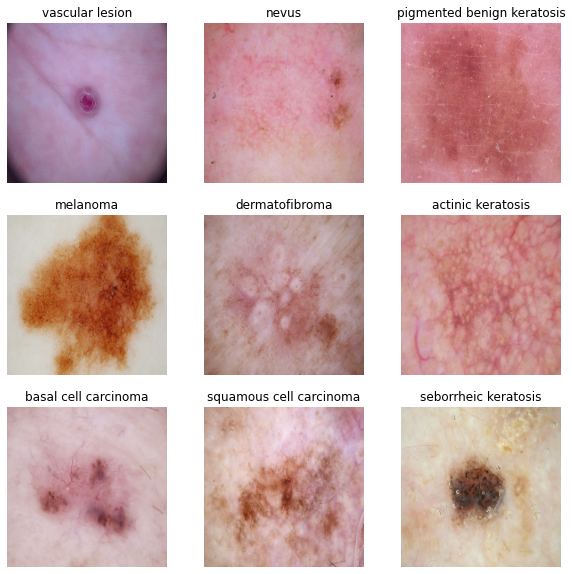

In [97]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
class_seen=[]
image_count=0
for images, labels in train_ds.take(10):
  for i in range(32):
    if class_names[labels[i]] not in class_seen:
      print(image_count, class_names[labels[i]])
      ax = plt.subplot(3, 3, image_count + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")
      class_seen.append(class_names[labels[i]])
      image_count += 1
      


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [98]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [99]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [100]:
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [101]:
### Todo, choose an appropirate optimiser and loss function
### Choosing the optimizer as adam and SparseCategoricalCrossentropy as Loss function as this is a categorical classification problem
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [102]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
56/56 [==============================] - 16s 81ms/step - loss: 2.0680 - accuracy: 0.2143 - val_loss: 1.9448 - val_accuracy: 0.2841
Epoch 2/3
56/56 [==============================] - 2s 29ms/step - loss: 1.7455 - accuracy: 0.3532 - val_loss: 1.6665 - val_accuracy: 0.4251
Epoch 3/3
56/56 [==============================] - 2s 29ms/step - loss: 1.5665 - accuracy: 0.4531 - val_loss: 1.4887 - val_accuracy: 0.5056


In [103]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 41, 41, 32)       

### Train the model

In [104]:
epochs = 20
history = model.fit(train_ds,  validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4293 - accuracy: 0.4983 - val_loss: 1.4341 - val_accuracy: 0.4832
Epoch 2/20
56/56 [==============================] - 2s 29ms/step - loss: 1.3425 - accuracy: 0.5206 - val_loss: 1.4166 - val_accuracy: 0.5101
Epoch 3/20
56/56 [==============================] - 2s 29ms/step - loss: 1.2980 - accuracy: 0.5335 - val_loss: 1.4628 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 2s 29ms/step - loss: 1.2300 - accuracy: 0.5725 - val_loss: 1.4363 - val_accuracy: 0.5011
Epoch 5/20
56/56 [==============================] - 2s 29ms/step - loss: 1.1639 - accuracy: 0.5843 - val_loss: 1.3879 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 2s 28ms/step - loss: 1.1616 - accuracy: 0.5932 - val_loss: 1.4558 - val_accuracy: 0.5101
Epoch 7/20
56/56 [==============================] - 2s 29ms/step - loss: 1.0856 - accuracy: 0.6099 - val_loss: 1.5026 - val_accuracy: 0.5257
Epoch 8/20
56

### Visualizing training results

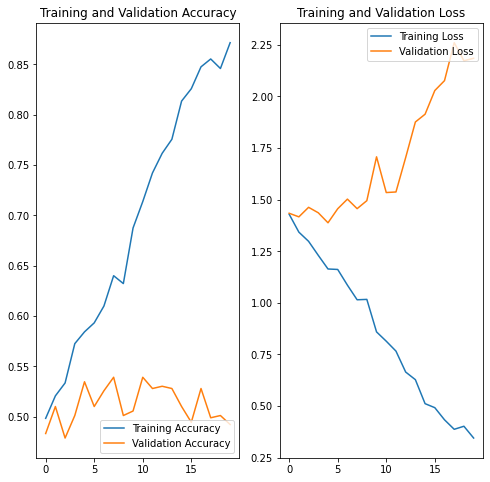

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 55% accuracy on the validation set.

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 55% in the training process. Also, the difference in accuracy between training and validation accuracy is huge and this is a great evidence of overfitting.

**Overfitting:** When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.



In [106]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

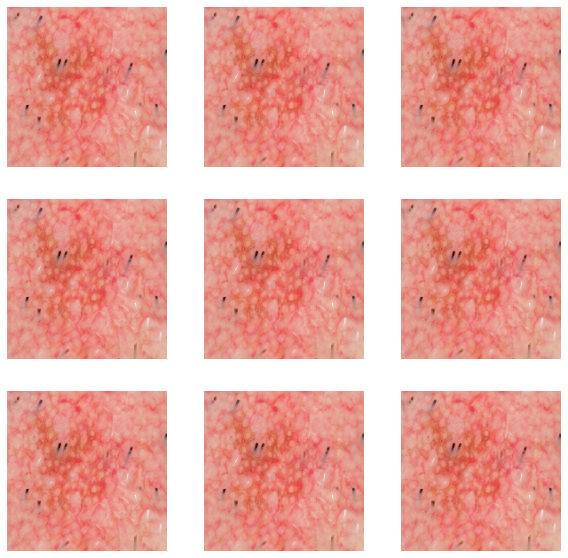

In [107]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Lets see if horizontal flip augmentation can help addressing the issue of Model overfitting
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [108]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


### Compiling the model

In [109]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

### Training the model

In [111]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
## your training code

Epoch 1/20
56/56 [==============================] - 3s 32ms/step - loss: 2.0413 - accuracy: 0.1987 - val_loss: 1.9663 - val_accuracy: 0.2438
Epoch 2/20
56/56 [==============================] - 2s 27ms/step - loss: 1.9155 - accuracy: 0.3002 - val_loss: 1.8327 - val_accuracy: 0.3110
Epoch 3/20
56/56 [==============================] - 2s 27ms/step - loss: 1.6590 - accuracy: 0.4012 - val_loss: 1.5952 - val_accuracy: 0.3915
Epoch 4/20
56/56 [==============================] - 2s 27ms/step - loss: 1.5900 - accuracy: 0.4286 - val_loss: 1.5517 - val_accuracy: 0.4362
Epoch 5/20
56/56 [==============================] - 2s 27ms/step - loss: 1.4476 - accuracy: 0.5100 - val_loss: 1.4238 - val_accuracy: 0.4989
Epoch 6/20
56/56 [==============================] - 2s 29ms/step - loss: 1.3900 - accuracy: 0.5100 - val_loss: 1.4333 - val_accuracy: 0.5011
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4435 - accuracy: 0.4877 - val_loss: 1.3737 - val_accuracy: 0.5302
Epoch 8/20
56

### Visualizing the results

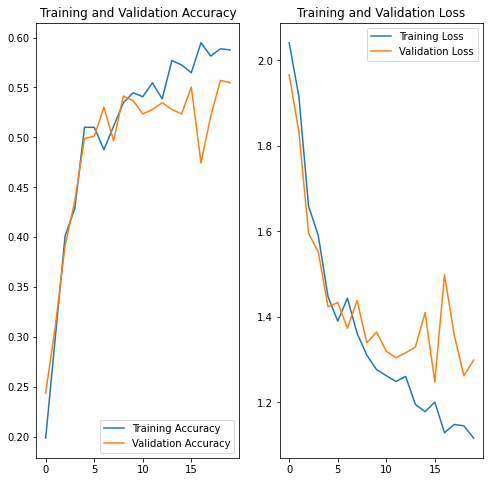

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The Overfitting issue seems to be addressed. The Model accuracy however has dropped to 60%. But the model maintains almost the same accuracy level with unseen validation data set. This is good. The above plot also shows some presence of underfitting as the validation accuracy has out performed training accuracy for some samples.  

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

Check how many images are present in each subset

actinic keratosis
/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train
/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis
114
basal cell carcinoma
/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train
/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma
376
dermatofibroma
/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train
/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma
95
melanoma
/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train
/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imag

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

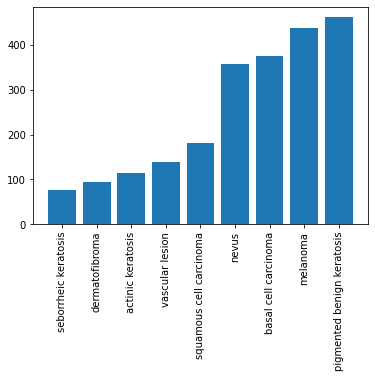

In [113]:
## Your code goes here.
class_count={}
for i in class_names:
  print (i)
  print(data_dir_train)
  data_dir = pathlib.Path(data_dir_train , i)
  print(data_dir)  
  image_count = len(list(data_dir.glob('*.jpg')))
  print(image_count)
  class_count[i]= image_count

df=pd.DataFrame(class_count.values(), index=class_count.keys(), columns=['count'])
df['percentage'] = round(100 * df['count']/df['count'].sum(), 1)
print(df.sort_values(by=['count'], ascending=False))

class_count={k:v for k, v in sorted(class_count.items(), key=lambda item: item[1]) }
plt.bar(class_count.keys(), height=class_count.values())
plt.xticks(rotation=90)


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

Seborrheic keratosis class has the least number of samples. 3.4% of the total samples are of Seborrheic Keratosis type.

#### - Which classes dominate the data in terms proportionate number of samples?

Pigmented benign keratosis has the maximum number of samples. 20.6% of the samples are of this type.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [114]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [115]:
path_to_training_dataset="To do"
import Augmentor
for i in class_names:
    data_dir = pathlib.Path(data_dir_train , i)
    p = Augmentor.Pipeline(data_dir)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF053F5D10>: 100%|██████████| 500/500 [00:18<00:00, 26.44 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF05503F10>: 100%|██████████| 500/500 [00:18<00:00, 27.17 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF05EE1110>: 100%|██████████| 500/500 [00:18<00:00, 27.07 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCF0555B650>: 100%|██████████| 500/500 [01:25<00:00,  5.82 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF1A0BA2D0>: 100%|██████████| 500/500 [01:23<00:00,  5.99 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF972DEF90>: 100%|██████████| 500/500 [00:20<00:00, 24.01 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCF971C2CD0>: 100%|██████████| 500/500 [00:42<00:00, 11.70 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF1A6057D0>: 100%|██████████| 500/500 [00:19<00:00, 25.36 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF055CF690>: 100%|██████████| 500/500 [00:18<00:00, 26.32 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [116]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [117]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028990.jpg_99b5ea75-aa33-41a9-b669-567e8761cae4.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026729.jpg_2ef40dda-8957-4f34-be6a-fda72d50cd70.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029827.jpg_4efcf7a9-626b-4222-aa38-4d9f19bcd72c.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029827.jpg_51362882-570e-4b20-9b0d-6dd136dcf016.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Co

In [118]:
## original_df - > path_list, lesion_list
path_list= [x for x in glob.glob(os.path.join(data_dir_train,'*', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025780.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025803.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025825.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025953.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025957.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025992.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging 

In [119]:
len(path_list)

2239

In [120]:
os.path.join(data_dir_train, '*', '*.jpg')

'/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/*.jpg'

In [121]:
os.path.dirname(os.path.join(data_dir_train, '*', '*.jpg'))

'/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*'

In [122]:
os.path.dirname(os.path.dirname(os.path.join(data_dir_train, '*', '*.jpg')))

'/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

In [123]:
os.path.basename(os.path.dirname(os.path.dirname(os.path.join(data_dir_train, '*', '*.jpg'))))

'Train'

In [124]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list[0]

'actinic keratosis'

In [125]:
len(lesion_list)

2239

In [126]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [127]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [128]:
dataframe_dict_new

{'/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028990.jpg_99b5ea75-aa33-41a9-b669-567e8761cae4.jpg': 'actinic keratosis',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026729.jpg_2ef40dda-8957-4f34-be6a-fda72d50cd70.jpg': 'actinic keratosis',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029827.jpg_4efcf7a9-626b-4222-aa38-4d9f19bcd72c.jpg': 'actinic keratosis',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029827.jpg_51362882-570e-4b20-9b0d-6dd136dcf016.jpg': 'actinic keratosis',
 '/content/g

In [129]:
pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

,Path,Label
0,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,actinic keratosis
1,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,actinic keratosis
2,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,actinic keratosis
3,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,actinic keratosis
4,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,actinic keratosis
...,...,...
4495,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,vascular lesion
4496,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,vascular lesion
4497,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,vascular lesion
4498,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,vascular lesion


In [130]:

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


In [131]:
df2.Path[0]

'/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028990.jpg_99b5ea75-aa33-41a9-b669-567e8761cae4.jpg'

In [132]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [133]:
original_df = pd.DataFrame(list(dataframe_dict.items()), columns = ['Path','Label'])
new_df = original_df.append(df2)

In [134]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [135]:
new_df

,Path,Label
0,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,actinic keratosis
1,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,actinic keratosis
2,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,actinic keratosis
3,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,actinic keratosis
4,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,actinic keratosis
...,...,...
4495,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,vascular lesion
4496,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,vascular lesion
4497,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,vascular lesion
4498,/content/gdrive/MyDrive/Colab Notebooks/CNN/Sk...,vascular lesion


In [136]:
pathlib.Path(data_dir_train)

PosixPath('/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [137]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [140]:
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
#"path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training" , 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [141]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [142]:
## your code goes here
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [143]:
## your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [144]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

#### **Todo:**  Train your model

In [145]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 33s 183ms/step - loss: 1.9345 - accuracy: 0.2450 - val_loss: 1.5179 - val_accuracy: 0.4284
Epoch 2/30
169/169 [==============================] - 33s 189ms/step - loss: 1.5391 - accuracy: 0.4191 - val_loss: 1.4239 - val_accuracy: 0.4684
Epoch 3/30
169/169 [==============================] - 33s 189ms/step - loss: 1.4007 - accuracy: 0.4657 - val_loss: 1.3200 - val_accuracy: 0.5033
Epoch 4/30
169/169 [==============================] - 31s 178ms/step - loss: 1.3195 - accuracy: 0.4974 - val_loss: 1.2677 - val_accuracy: 0.5360
Epoch 5/30
169/169 [==============================] - 31s 178ms/step - loss: 1.2628 - accuracy: 0.5132 - val_loss: 1.2575 - val_accuracy: 0.5323
Epoch 6/30
169/169 [==============================] - 31s 177ms/step - loss: 1.2160 - accuracy: 0.5371 - val_loss: 1.1701 - val_accuracy: 0.5509
Epoch 7/30
169/169 [==============================] - 35s 203ms/step - loss: 1.1655 - accuracy: 0.5590 - val_loss: 1.0709 - val_ac

#### **Todo:**  Visualize the model results

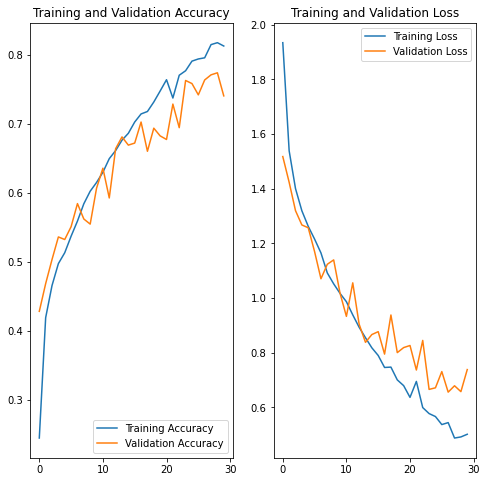

In [146]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Yes. The model seems to have gotten rid of the overfitting / underfitting behavior. Also the model has achieved 80% accuracy in training and almost the same accuracy with unseeen data.
Yes. The class rebalance has helped in handling the overfitting / underfitting behavior as we have added more images to all the sub class_names.
The model had better chance of learning from the additional data especially the classes that had very less number of images seem to have 
improved in identifying the class correctly compared to previous runs.